In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(60000, 784) (60000, 10)
(10000, 10) (10000, 10)


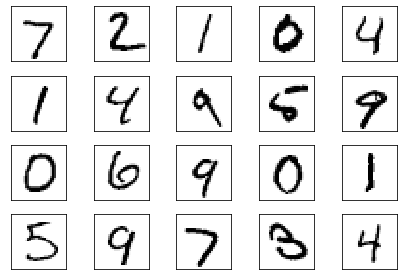

In [2]:
#load data
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)    # MNIST_data指的是存放数据的文件夹路径，one_hot=True 为采用one_hot的编码方式编码标签

train_X = mnist.train.images                #训练集样本
validation_X = mnist.validation.images      #验证集样本
train_X = np.vstack((train_X, validation_X))
test_X = mnist.test.images                  #测试集样本
#labels
train_Y = mnist.train.labels                #训练集标签
validation_Y = mnist.validation.labels      #验证集标签
train_Y = np.vstack((train_Y, validation_Y))
test_Y = mnist.test.labels                  #测试集标签

print(train_X.shape,train_Y.shape)          #输出训练集样本和标签的大小
print(test_Y.shape,test_Y.shape) 
#查看数据，例如训练集中第一个样本的内容和标签
#print(train_X[0])       
#print(train_Y[0])

#可视化样本，下面是输出了训练集中前20个样本
fig, ax = plt.subplots(nrows=4,ncols=5,sharex='all',sharey='all')
ax = ax.flatten()
for i in range(20):
    img = test_X[i].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [3]:
import torch
# Define Net
class Net(torch.nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, D_out)

    def forward(self, x):
        h1_relu = self.linear1(x).clamp(min=0)
        h2_relu = self.linear2(h1_relu).clamp(min=0)
        y_pred = self.linear3(h2_relu)
        return y_pred

In [4]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H1, H2, D_out = train_X.shape[0], train_X.shape[1], 300, 300, train_Y.shape[1]

train_X = torch.Tensor(train_X)
train_Y = torch.LongTensor(train_Y)

# Construct our model by instantiating the class defined above
model = Net(D_in, H1, H2, D_out)

# Construct our loss function and an Optimizer. 
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

# Train
BATCH_SIZE = 128
for epoch in range(150):
    for start in range(0, len(train_X), BATCH_SIZE):
        end = start + BATCH_SIZE
        batchX = train_X[start:end]
        batchY = train_Y[start:end]

        y_pred = model(batchX)
        loss = loss_fn(y_pred, batchY.max(1)[1])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Find loss on training data
    loss = loss_fn(model(train_X), train_Y.max(1)[1]).item()
    print('Epoch:', epoch, 'Loss:', loss)


Epoch: 0 Loss: 0.35092058777809143
Epoch: 1 Loss: 0.2763139009475708
Epoch: 2 Loss: 0.23619860410690308
Epoch: 3 Loss: 0.2052116096019745
Epoch: 4 Loss: 0.1802753210067749
Epoch: 5 Loss: 0.16004003584384918
Epoch: 6 Loss: 0.1430763453245163
Epoch: 7 Loss: 0.12865322828292847
Epoch: 8 Loss: 0.11623010784387589
Epoch: 9 Loss: 0.1054726168513298
Epoch: 10 Loss: 0.09610138088464737
Epoch: 11 Loss: 0.08776215463876724
Epoch: 12 Loss: 0.08038163185119629
Epoch: 13 Loss: 0.07371201366186142
Epoch: 14 Loss: 0.06777231395244598
Epoch: 15 Loss: 0.06237929314374924
Epoch: 16 Loss: 0.05746529996395111
Epoch: 17 Loss: 0.05296437814831734
Epoch: 18 Loss: 0.04889976978302002
Epoch: 19 Loss: 0.04513563588261604
Epoch: 20 Loss: 0.041675034910440445
Epoch: 21 Loss: 0.038506656885147095
Epoch: 22 Loss: 0.03557492047548294
Epoch: 23 Loss: 0.0328085832297802
Epoch: 24 Loss: 0.030288642272353172
Epoch: 25 Loss: 0.027924086898565292
Epoch: 26 Loss: 0.02570232003927231
Epoch: 27 Loss: 0.02371654286980629
Epoc

In [6]:
test_X = torch.Tensor(test_X)
test_Y = torch.LongTensor(test_Y)

with torch.no_grad():
    pred = model(test_X)
pred = pred.max(1, keepdim=True)[1]
print(pred.data)

tensor([[7],
        [2],
        [1],
        ...,
        [4],
        [5],
        [6]])


In [7]:
correct = pred.eq(test_Y.max(1)[1].view_as(pred)).sum().item()
print('\nTest set:  Accuracy: {}/{} ({:.0f}%)\n'.format(correct,len(test_Y),100. * correct /len(test_Y)))


Test set:  Accuracy: 9805/10000 (98%)

